In [57]:
import pandas as pd
import numpy as np
# !pip3 install statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
# from sklearn.decomposition import PCA

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 8.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 7.5 MB/s eta 0:00:00


In [3]:
df = pd.DataFrame({'movie':['a','b','c','a','b','c','a','b','c'],
'rating':[9,7,6,9,5,7,8,9,5]})

In [4]:
df.rating.mean()

7.222222222222222

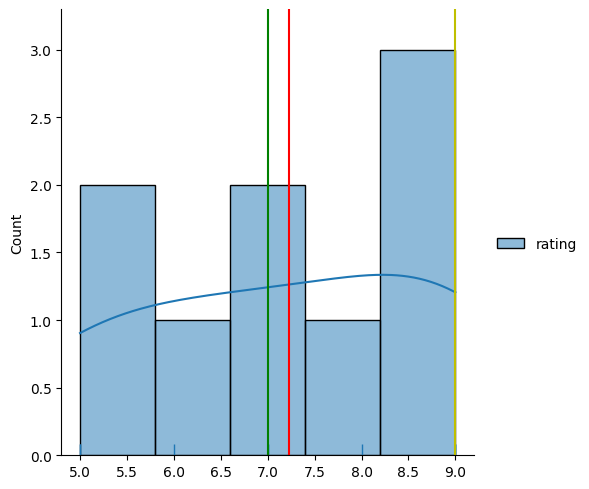

In [5]:
sns.displot(df,kde=True, rug=True)
plt.axvline(np.mean(df.rating),color='r',linestyle='-')
plt.axvline(np.median(df.rating),color='g',linestyle='-')
plt.axvline(df.rating.mode().values[0],color='y',linestyle='-')


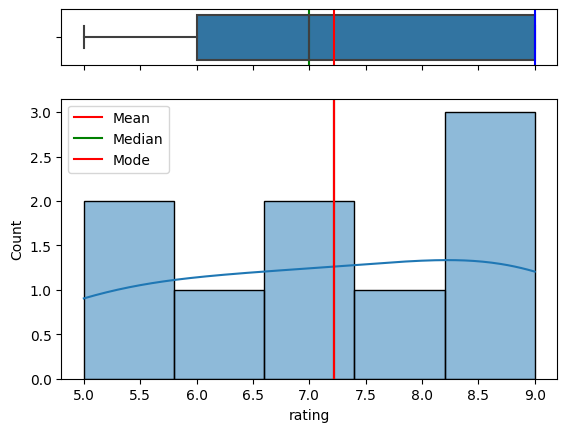

In [6]:
f, (ax_box,ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios':(0.2,1)})
mean = np.mean(df.rating)
median = np.median(df.rating)
mode = df.rating.mode().values[0]

sns.boxplot(data=df,x='rating',ax=ax_box)
ax_box.axvline(mean,color='r',linestyle='-')
ax_box.axvline(median,color='g',linestyle='-')
ax_box.axvline(mode,color='b',linestyle='-')

sns.histplot(data=df,x='rating',ax=ax_hist, kde = True)
ax_hist.axvline(mean,color='r',linestyle='-',label='Mean')
ax_hist.axvline(mean,color='g',linestyle='-',label='Median')
ax_hist.axvline(mean,color='r',linestyle='-',label='Mode')

ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

In [7]:
df.rating.var()

2.6944444444444446

In [8]:
df.rating.std()

1.6414763002993509

In [9]:
mean = df.groupby(['movie'])['rating'].mean()
std = df.groupby(['movie'])['rating'].std()
mean 

movie
a    8.666667
b    7.000000
c    6.000000
Name: rating, dtype: float64

In [10]:
std

movie
a    0.57735
b    2.00000
c    1.00000
Name: rating, dtype: float64

<Axes: xlabel='movie'>

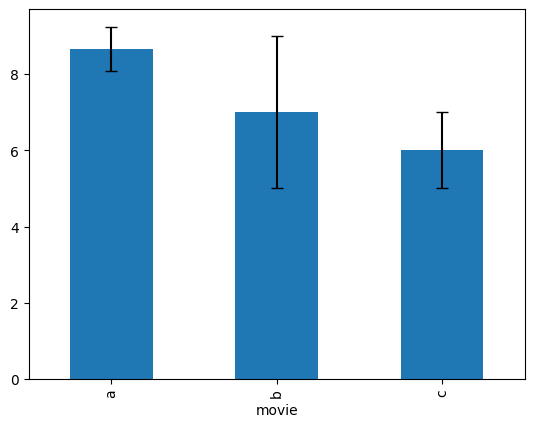

In [11]:
fig,ax = plt.subplots()
mean.plot.bar(yerr=std, ax=ax, capsize=4)

In [12]:
df1 = pd.DataFrame({'pop_sample':range(20)})

In [13]:
df1.sample(5).mean()

pop_sample    9.2
dtype: float64

In [14]:
df1.sample(10).mean()

pop_sample    7.9
dtype: float64

In [15]:
df1.mean()

pop_sample    9.5
dtype: float64

In [16]:
from scipy import stats
stats.sem(df1)

array([1.32287566])

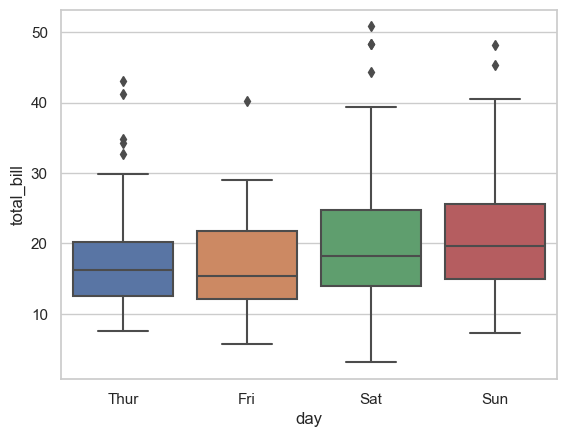

In [19]:
df2 = sns.load_dataset('tips')
style=sns.set_theme(style='whitegrid')
ax = sns.boxplot(x='day',y='total_bill',data=df2)

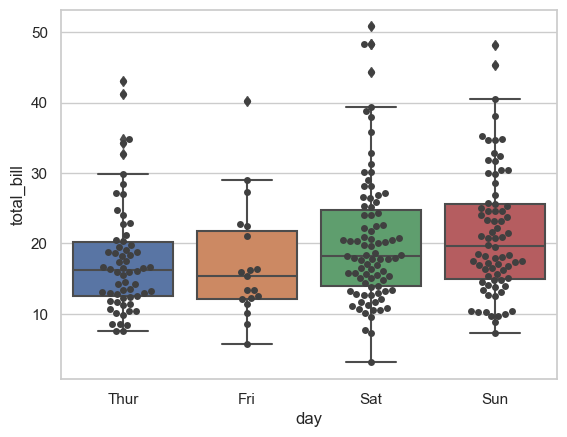

In [20]:

ax = sns.boxplot(x='day',y='total_bill',data=df2)
ax = sns.swarmplot(x='day',y='total_bill',data=df2, color='0.25')

In [21]:
print(df2['total_bill'].quantile([0.05,0.25,0.5,0.75]))

0.05     9.5575
0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64


In [22]:
print(df2['total_bill'].quantile([0.75])-df2['total_bill'].quantile([0.25]))

0.25   NaN
0.75   NaN
Name: total_bill, dtype: float64


In [40]:
df3 = sns.load_dataset('iris')
df3 = df3.drop(columns = ['species'])
df3.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


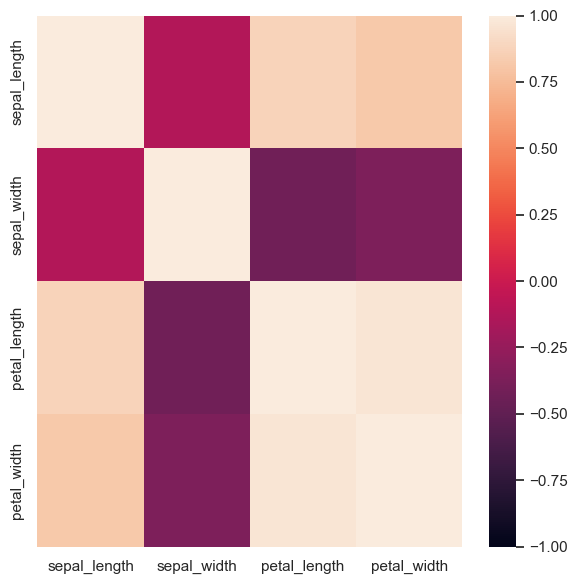

In [41]:

fig, ax =plt.subplots(figsize=(6,6))
ax = sns.heatmap(df3.corr(), vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

In [42]:
a = [11,12,22,11]
b = [7,8,9,10]
c = [10,11,22,23]
arr = np.array([a,b,c])

In [43]:
cov_matrix = np.cov(arr,bias=True)

In [44]:
cov_matrix

array([[21.5 ,  1.25, 13.75],
       [ 1.25,  1.25,  6.25],
       [13.75,  6.25, 36.25]])

<function matplotlib.pyplot.show(close=None, block=None)>

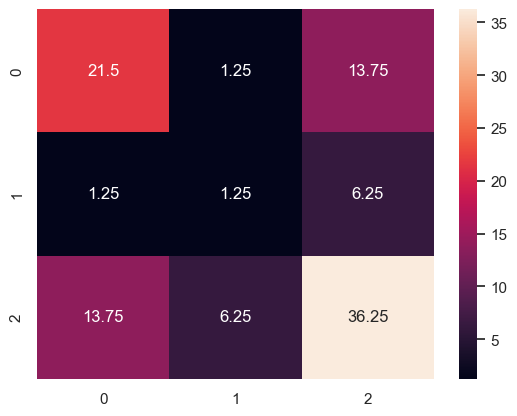

In [45]:
sns.heatmap(cov_matrix,annot=True, fmt = 'g')
plt.show

In [47]:
df3.skew()

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

In [49]:
df3.kurtosis()

sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64

[]

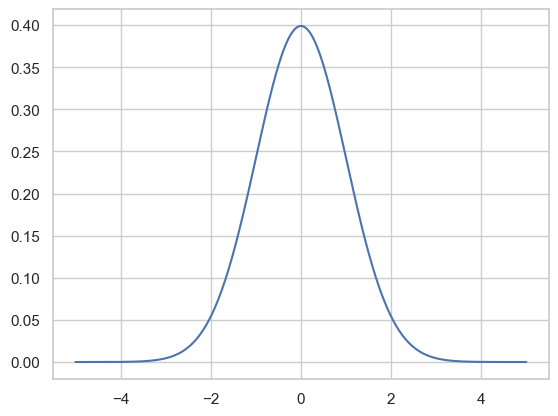

In [50]:
norm1 = np.arange(-5,5,0.001)
mean = 0.0
std = 1.0
pdf = stats.norm.pdf(norm1,mean,std)
plt.plot(norm1,pdf)
plt.plot()

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

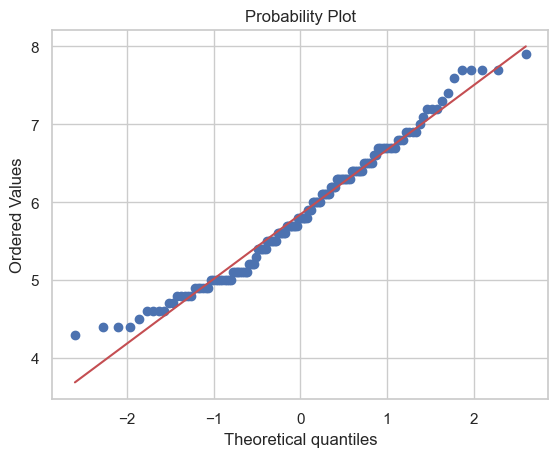

In [51]:
import pylab
stats.probplot(df3.sepal_length,plot=pylab)

<Axes: xlabel='sepal_length', ylabel='Density'>

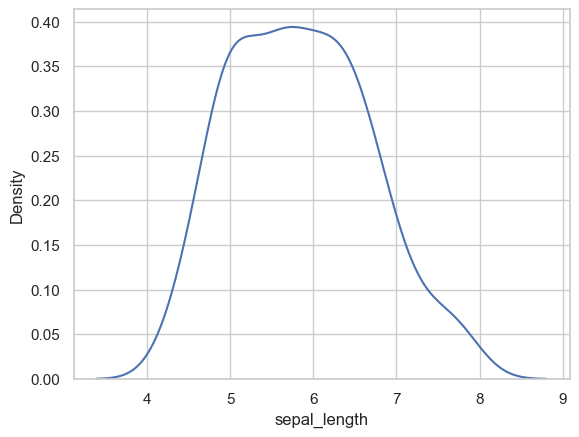

In [52]:
sns.kdeplot(df3.sepal_length)

<function matplotlib.pyplot.show(close=None, block=None)>

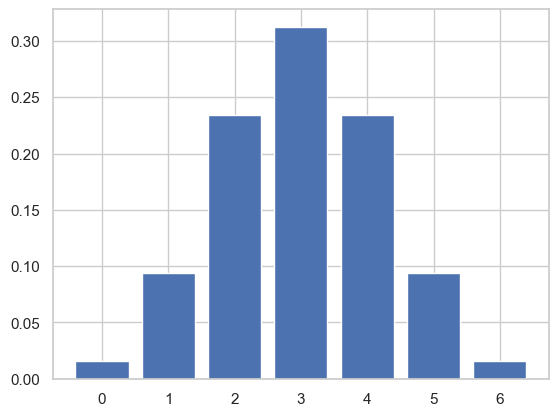

In [53]:
from math import dist
from scipy.stats import binom

n = 6
p = 0.5
r_value = list(range(n+1))
dist = [binom.pmf(r,n,p) for r in r_value]
plt.bar(r_value,dist)
plt.show

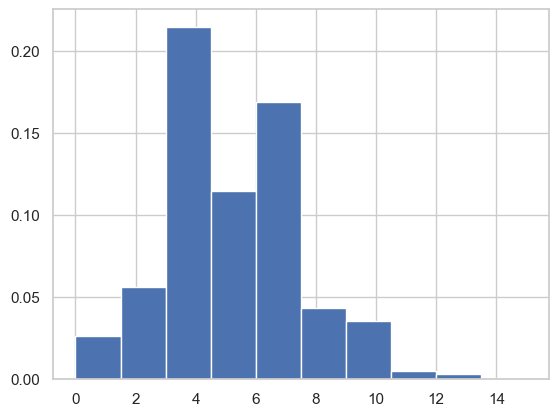

In [58]:
s = np.random.poisson(5,10000)
count, bins, ignored = plt.hist(s,10,density=True)
plt.show()

In [59]:
import statsmodels.stats.api as sms
sms.DescrStatsW(df3.sepal_length).tconfint_mean()

(5.709732481507365, 5.9769341851593)

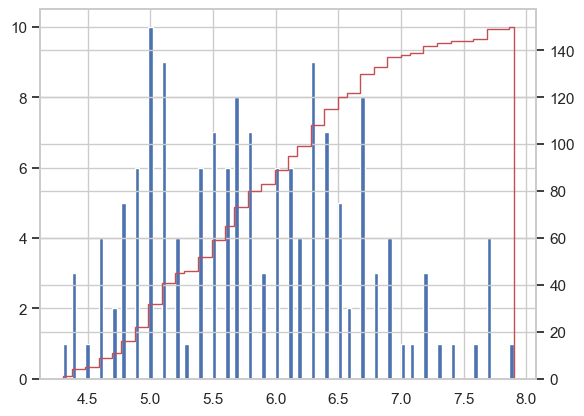

In [60]:

fig, ax =plt.subplots()
ax2 = ax.twinx()
n,bins,patches = ax.hist(df3.sepal_length,bins=100)
n,bins,patches = ax2.hist(df3.sepal_length,bins=100,cumulative=1,histtype='step',color = 'r')

(array([  9.,  32.,  46.,  73.,  89., 115., 133., 139., 144., 150.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 [<matplotlib.patches.Polygon at 0x2a17213f0>])

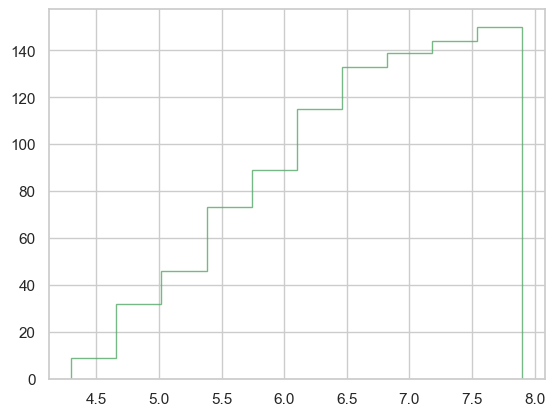

In [61]:
plt.hist(df3.sepal_length,cumulative=True,label='CDF',histtype='step',alpha=0.8,color='g')

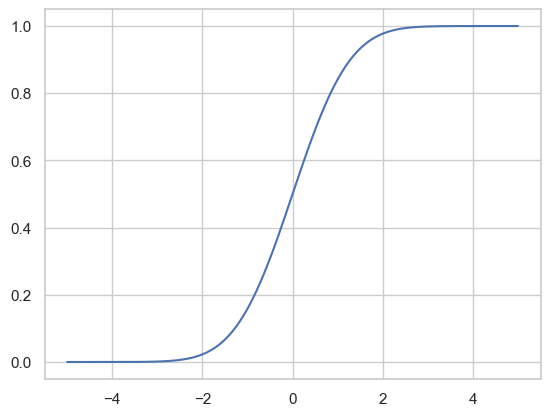

In [62]:
cdf = stats.norm.cdf(norm1)
plt.plot(norm1,cdf)
plt.show()

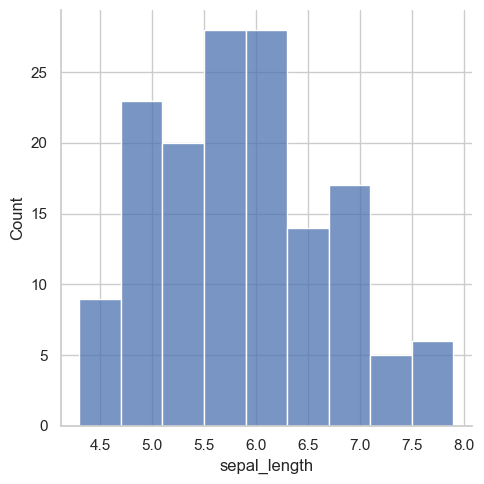

In [63]:
ax = sns.displot(df3.sepal_length)